# Combine Data


In [126]:
# CSV Data를 df으로 바꾸기
import pandas as pd
hypertension_df = pd.read_csv('../Data/Final_HT_data.csv')
diabetes_df = pd.read_csv('../Data/DM_data.csv')

In [127]:
# Data Shape csv의 Features 보기
print("# of Hypertension Features:", hypertension_df.shape[1])
print("# of Hypertension Data Points:", hypertension_df.shape[0])
print("Hypertension Columns:")
print(hypertension_df.columns)

print("# of Diabetes Features:", diabetes_df.shape[1])
print("# of Diabetes Data Points:", diabetes_df.shape[0])
print("\nDiabetes Columns:")
print(diabetes_df.columns)


# of Hypertension Features: 25
# of Hypertension Data Points: 149967
Hypertension Columns:
Index(['HY_YN', 'AGE', 'gender', 'WAIST', 'BP_HIGH', 'BP_LWST', 'BLDS',
       'TOT_CHOLE', 'SGOT_ASL', 'SGPT_ALT', 'GAMMA_GTP', 'HMG', 'H_APOP_YN',
       'H_HDISE_YN', 'H_DIABML_YN', 'F_APOP_YN', 'F_HDISE_YN', 'F_HPRT_YN',
       'F_DIABML_YN', 'SMK_STAT', 'SMK_TERM', 'DSQTY', 'EXER_M', 'TM1_DRKQTY',
       'DRNK_HABIT'],
      dtype='object')
# of Diabetes Features: 26
# of Diabetes Data Points: 145718

Diabetes Columns:
Index(['HY_YN', 'SEX', 'AGE_GROUP', 'CTRB_PT_TYPE_CD', 'SCR_CNT', 'T_IN_LOS',
       'T_OUT_LOS', 'HEIGHT', 'WEIGHT', 'WAIST', 'BP_HIGH', 'BP_LWST', 'BLDS',
       'TOT_CHOLE', 'HMG', 'SGOT_AST', 'SGPT_ALT', 'GAMMA_GTP', 'F_HPRT_YN',
       'F_APOP_YN', 'F_HDISE_YN', 'F_DIABML_YN', 'F_CANCER_YN', 'SMK_STAT',
       'DRNK_HABIT', 'EXER'],
      dtype='object')


In [128]:
#hypertension_df 전처리

# Change Gender to 1 and 2 (1 is male, 2 is female from now on)
# Rename the 'gender' column to 'SEX'
hypertension_df['gender'] = hypertension_df['gender'].replace({0: 2, 1: 1})
hypertension_df.rename(columns={'gender': 'SEX'}, inplace=True)

# Rename SGOT_ASL to SGOT_AST in hypertension_df (Same Thing!)
hypertension_df.rename(columns={'SGOT_ASL': 'SGOT_AST'}, inplace=True)

# Map HT.SMK_STAT to DM.SMK_STAT categories
hypertension_df['SMK_STAT'] = hypertension_df['SMK_STAT'].replace({
    1: 1,  # Never smoked
    2: 2,  # Former smoker
    3: 3,  # Current smoker (generalized)
    4: 3,  # Current smoker (various levels generalized to 'current smoker')
    5: 3
})

hypertension_df = hypertension_df.drop(columns=['EXER_M'])

In [129]:
#Diabetes_df 전처리

# Drop Unnecessary features for Diabetes
diabetes_df = diabetes_df.drop(columns=['SEX', 'SGOT_AST', 'SMK_STAT', 'HY_YN', 'AGE_GROUP' ])


# Re-map DM.EXER to align with HT.EXER categories
diabetes_df['EXER'] = diabetes_df['EXER'].replace({
    5: 1,  # Nearly daily
    4: 2,  # 5–6 times per week
    3: 2,  # 3–4 times per week
    2: 3,  # 1–2 times per week
    1: 5   # Non-exercising
})

In [130]:
common_columns = set(hypertension_df.columns).intersection(diabetes_df.columns)

# Print common columns
print("Number of Common Columns:", len(common_columns))
print("Common Columns between HT and DM:")
for i in common_columns:
    print(i)

Number of Common Columns: 13
Common Columns between HT and DM:
HMG
WAIST
TOT_CHOLE
F_HPRT_YN
DRNK_HABIT
F_HDISE_YN
SGPT_ALT
GAMMA_GTP
BLDS
F_DIABML_YN
F_APOP_YN
BP_LWST
BP_HIGH


In [131]:
# Convert data types to match if necessary (example: converting integers to floats)
# You can adjust based on any mismatches you find
for column in common_columns:
    if hypertension_df[column].dtype != diabetes_df[column].dtype:
        # Convert to a consistent data type (e.g., float) across both datasets
        hypertension_df[column] = hypertension_df[column].astype(float)
        diabetes_df[column] = diabetes_df[column].astype(float)

In [132]:
# Merge the datasets based on the remaining common columns
merged_df = pd.merge(hypertension_df, diabetes_df, on=list(common_columns), how='inner')

In [133]:
# Print the resulting merged DataFrame
print("Shape of Merged DataFrame:", merged_df.shape)
print("Merged DataFrame based on common columns:")
x = 1
for i in merged_df.columns:
    print(x, ' ',  i)
    x = x + 1


Shape of Merged DataFrame: (13840, 32)
Merged DataFrame based on common columns:
1   HY_YN
2   AGE
3   SEX
4   WAIST
5   BP_HIGH
6   BP_LWST
7   BLDS
8   TOT_CHOLE
9   SGOT_AST
10   SGPT_ALT
11   GAMMA_GTP
12   HMG
13   H_APOP_YN
14   H_HDISE_YN
15   H_DIABML_YN
16   F_APOP_YN
17   F_HDISE_YN
18   F_HPRT_YN
19   F_DIABML_YN
20   SMK_STAT
21   SMK_TERM
22   DSQTY
23   TM1_DRKQTY
24   DRNK_HABIT
25   CTRB_PT_TYPE_CD
26   SCR_CNT
27   T_IN_LOS
28   T_OUT_LOS
29   HEIGHT
30   WEIGHT
31   F_CANCER_YN
32   EXER


In [134]:
columns_insurance = [
    'HY_YN',
    'AGE', 
    'BP_HIGH',
    'BP_LWST',
    'BLDS',
    'TOT_CHOLE',
    'HMG',
    'SGOT_AST',
    'SGPT_ALT',
    'GAMMA_GTP',
    'SEX',
    'HEIGHT',
    'WEIGHT',
    'SCR_CNT',
    'T_IN_LOS',
   'T_OUT_LOS',
    'SMK_STAT',
    'DRNK_HABIT',
    'EXER',
    'H_APOP_YN',
    'H_HDISE_YN',
    'H_DIABML_YN'
]

In [135]:
# Filter merged_df to keep only the specified columns for insurance
merged_df_filtered = merged_df[columns_insurance]

# Display the filtered DataFrame
print("Filtered Merged DataFrame:")
print("Shape of Filtered Merged DataFrame:", merged_df_filtered.shape)
print(merged_df_filtered.head())


Filtered Merged DataFrame:
Shape of Filtered Merged DataFrame: (13840, 22)
   HY_YN  AGE  BP_HIGH  BP_LWST   BLDS  TOT_CHOLE   HMG  SGOT_AST  SGPT_ALT  \
0      0   50    100.0     70.0   83.0      204.0  11.5      22.0      12.0   
1      0   66    130.0     80.0  100.0      152.0  13.0      19.0      17.0   
2      0   62    115.0     70.0   84.0      249.0  14.0      27.0      22.0   
3      0   59    102.0     58.0   95.0      269.0  13.0      34.0      31.0   
4      0   53    134.0     75.0   89.0      287.0  12.0      24.0      22.0   

   GAMMA_GTP  ...  WEIGHT  SCR_CNT  T_IN_LOS  T_OUT_LOS  SMK_STAT  DRNK_HABIT  \
0       10.0  ...      49        3         0         36         1           1   
1       29.0  ...      72        2         0         55         1           1   
2       41.0  ...      58        4         0         32         1           1   
3       27.0  ...      58        1         5        137         1           1   
4       22.0  ...      63        5         0 

In [136]:
import numpy as np
# Remove rows with any null values
merged_df_filtered = merged_df_filtered.dropna()

# Check for null values
print("Number of null values per column:")
print(merged_df_filtered.isnull().sum())

Number of null values per column:
HY_YN          0
AGE            0
BP_HIGH        0
BP_LWST        0
BLDS           0
TOT_CHOLE      0
HMG            0
SGOT_AST       0
SGPT_ALT       0
GAMMA_GTP      0
SEX            0
HEIGHT         0
WEIGHT         0
SCR_CNT        0
T_IN_LOS       0
T_OUT_LOS      0
SMK_STAT       0
DRNK_HABIT     0
EXER           0
H_APOP_YN      0
H_HDISE_YN     0
H_DIABML_YN    0
dtype: int64


In [137]:
# Check for infinite values
print("\nNumber of infinite values per column:")
print(np.isinf(merged_df_filtered).sum())


Number of infinite values per column:
HY_YN          0
AGE            0
BP_HIGH        0
BP_LWST        0
BLDS           0
TOT_CHOLE      0
HMG            0
SGOT_AST       0
SGPT_ALT       0
GAMMA_GTP      0
SEX            0
HEIGHT         0
WEIGHT         0
SCR_CNT        0
T_IN_LOS       0
T_OUT_LOS      0
SMK_STAT       0
DRNK_HABIT     0
EXER           0
H_APOP_YN      0
H_HDISE_YN     0
H_DIABML_YN    0
dtype: int64


In [138]:
# Check for duplicate data
duplicates = merged_df.duplicated()
if duplicates.any():
    merged_df = merged_df.drop_duplicates()
    print("Duplicates found and removed.")
else:
    print("No duplicates found in the merged DataFrame.")

No duplicates found in the merged DataFrame.


In [139]:
ht_yn_counts = merged_df['HY_YN'].value_counts()

# Display the counts
print("Counts of HT_YN values in merged_df_filtered:")
print(ht_yn_counts)

Counts of HT_YN values in merged_df_filtered:
HY_YN
0    12854
1      986
Name: count, dtype: int64


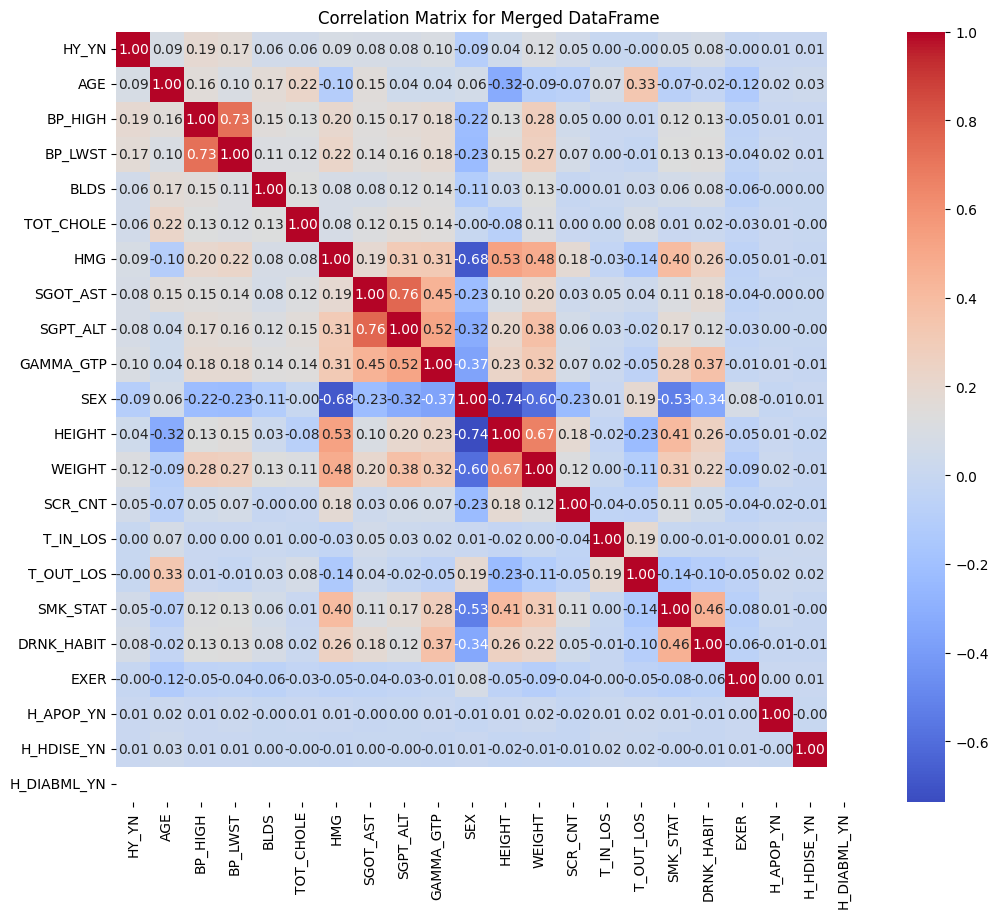

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = merged_df_filtered.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Merged DataFrame")
plt.show()


In [141]:
# Extract pairs of highly correlated features (|correlation| > 0.7)
high_corr_pairs = []

# Iterate through the correlation matrix
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):  # Only check upper triangle
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:  # Check for high correlation
            feature1 = correlation_matrix.index[i]
            feature2 = correlation_matrix.columns[j]
            high_corr_pairs.append((feature1, feature2, corr_value))

# Display highly correlated pairs
print("Highly Correlated Feature Pairs (|correlation| > 0.7):")
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} - {feature2}: {corr_value:.2f}")


Highly Correlated Feature Pairs (|correlation| > 0.7):
BP_HIGH - BP_LWST: 0.73
SGOT_AST - SGPT_ALT: 0.76
SEX - HEIGHT: -0.74


In [142]:
# Issue 1: Replace HEIGHT and WEIGHT with BMI
merged_df_filtered['BMI'] = merged_df_filtered['WEIGHT'] / ((merged_df_filtered['HEIGHT'] / 100) ** 2)
# Drop the original HEIGHT and SEX columns as they are now replaced by BMI
merged_df_filtered = merged_df_filtered.drop(columns=['WEIGHT', 'HEIGHT'])

# Issue 2: Replace SGPT_ALT and SGOT_AST with an average liver enzyme feature
merged_df_filtered['Liver_Enzyme_Avg'] = (merged_df_filtered['SGPT_ALT'] + merged_df_filtered['SGOT_AST']) / 2
# Drop the original liver enzyme columns
merged_df_filtered = merged_df_filtered.drop(columns=['SGPT_ALT', 'SGOT_AST'])

# Issue 3: Replace BP_HIGH and BP_LWST with Mean Arterial Pressure (MAP)
merged_df_filtered['MAP'] = (merged_df_filtered['BP_HIGH'] + 2 * merged_df_filtered['BP_LWST']) / 3
# Drop the original blood pressure columns
merged_df_filtered = merged_df_filtered.drop(columns=['BP_HIGH', 'BP_LWST'])

# Check the shape and columns of the updated DataFrame
print("Updated DataFrame after addressing multicollinearity issues:")
print("Shape:", merged_df_filtered.shape)
print("Columns:", merged_df_filtered.columns)


Updated DataFrame after addressing multicollinearity issues:
Shape: (13836, 19)
Columns: Index(['HY_YN', 'AGE', 'BLDS', 'TOT_CHOLE', 'HMG', 'GAMMA_GTP', 'SEX',
       'SCR_CNT', 'T_IN_LOS', 'T_OUT_LOS', 'SMK_STAT', 'DRNK_HABIT', 'EXER',
       'H_APOP_YN', 'H_HDISE_YN', 'H_DIABML_YN', 'BMI', 'Liver_Enzyme_Avg',
       'MAP'],
      dtype='object')


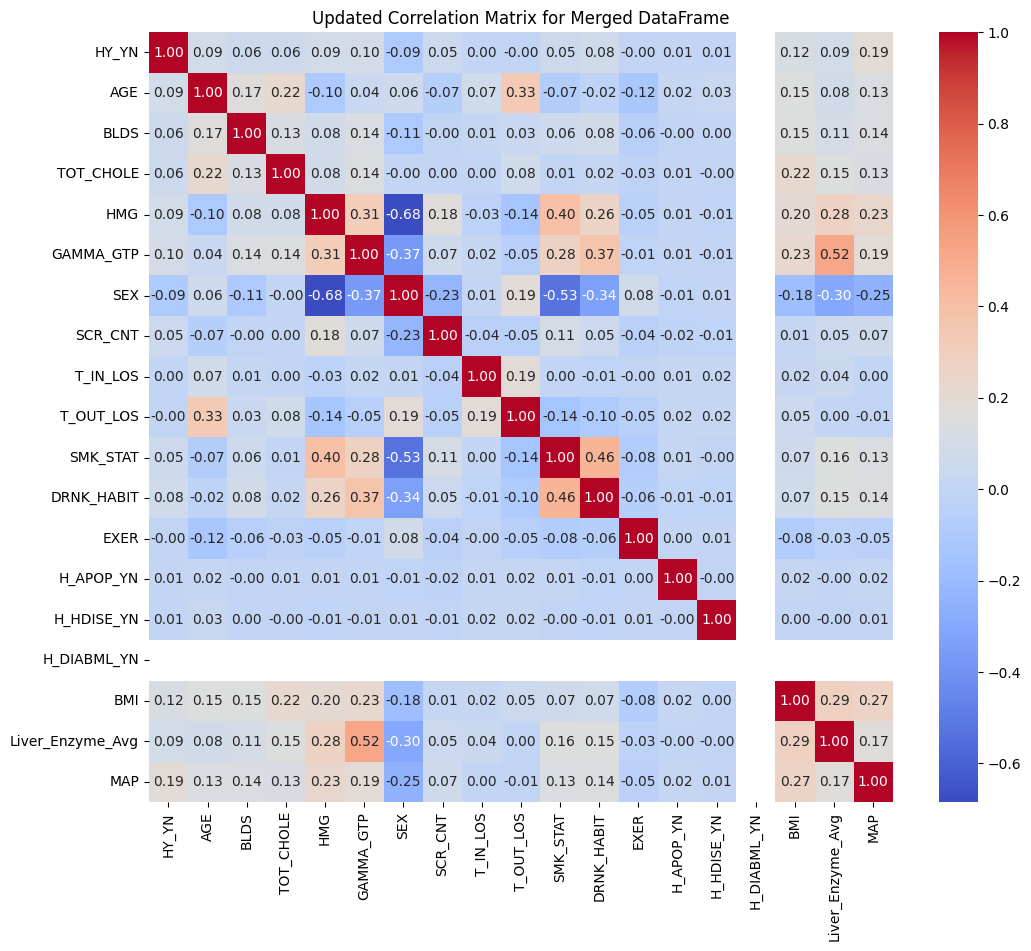


Highly Correlated Feature Pairs (|correlation| > 0.7) after adjustments:


In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recalculate the correlation matrix for the updated DataFrame
correlation_matrix = merged_df_filtered.corr()

# Plot the updated correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Updated Correlation Matrix for Merged DataFrame")
plt.show()

# Optionally, print pairs with high collinearity after the adjustments
high_corr_pairs = []
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            feature1 = correlation_matrix.index[i]
            feature2 = correlation_matrix.columns[j]
            high_corr_pairs.append((feature1, feature2, corr_value))

print("\nHighly Correlated Feature Pairs (|correlation| > 0.7) after adjustments:")
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} - {feature2}: {corr_value:.2f}")


In [144]:
# Export the DataFrame to a CSV file
merged_df_filtered.to_csv('filtered_merged_data.csv', index=False)
print("DataFrame successfully exported to 'filtered_merged_data.csv'")


DataFrame successfully exported to 'filtered_merged_data.csv'
